# In this notebook we visualize effects of inserting a single CTCF in multiple backgrounds

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
# def load_data(h5_dirs, scd_stats, models=[1]):
#     dfs = []
#     for h5_file in glob.glob(h5_dirs):
        
#         dfs.append(
#             akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
#         )
#     dfs = pd.concat(dfs)

#     for stat in scd_stats:
#         for model in models:
#             dfs[f"mean_{stat}_score_m{model}"] = (
#                 dfs[f"{stat}_h1_m{model}_t0"]
#                 + dfs[f"{stat}_h1_m{model}_t1"]
#                 + dfs[f"{stat}_h1_m{model}_t2"]
#                 + dfs[f"{stat}_h1_m{model}_t3"]
#                 + dfs[f"{stat}_h1_m{model}_t4"]
#                 + dfs[f"{stat}_h1_m{model}_t5"]
#             ) / 6
        
#     return dfs.reset_index(drop=True)


# import numpy as np

def load_data(h5_dirs, scd_stats, models=[1]):
    dfs = []
    for h5_file in glob.glob(h5_dirs):
        
        dfs.append(
            akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
        )
    # dfs = pd.concat(dfs)
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')

    # dfs = merged_df
    # df_1 = dfs[0]
    for stat in scd_stats:
        for model in models:
            merged_df[f"mean_{stat}_score_m{model}"] = (
                merged_df[f"{stat}_h1_m{model}_t0"]
                + merged_df[f"{stat}_h1_m{model}_t1"]
                + merged_df[f"{stat}_h1_m{model}_t2"]
                + merged_df[f"{stat}_h1_m{model}_t3"]
                + merged_df[f"{stat}_h1_m{model}_t4"]
                + merged_df[f"{stat}_h1_m{model}_t5"]
            ) / 6
        
        # Calculate mean score over models for current statistic
        mean_score = np.mean([
            merged_df[f"mean_{stat}_score_m{model}"] for model in models
        ], axis=0)
        
        # Add mean score column to DataFrame
        merged_df[f"mean_{stat}_score"] = mean_score
    
    return merged_df.reset_index(drop=True)


In [3]:
one_strong_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/one_strong_motif_in_different_backgrounds_config_test/*/*/*.h5"
)
one_weak_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/one_weak_motif_in_different_backgrounds_config_test/*/*/*.h5"
)
two_strong_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/two_strong_motif_in_different_backgrounds/*.h5"
)
two_weak_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/two_weak_motif_in_different_backgrounds/*.h5"
)

scd_stats = ["SCD"]

one_strong_motif_in_different_backgrounds_df = load_data(one_strong_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0,1,2,3,4,5,6])
one_weak_motif_in_different_backgrounds_df = load_data(one_weak_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0,1,2,3,4,5,6])
two_strong_motif_in_different_backgrounds_df = load_data(two_strong_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0])
two_weak_motif_in_different_backgrounds_df = load_data(two_weak_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0])

one_strong_motif_in_different_backgrounds_df

/tmp/SLURM_12068570/ipykernel_53237/215884272.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')
/tmp/SLURM_12068570/ipykernel_53237/215884272.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')
/tmp/SLURM_12068570/ipykernel_53237/215884272.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')
/tmp/SLURM_12068570/ipykernel_53237/215884272.py:36: FutureWarning:

,CTCF_1_genomic_SCD_x,CTCF_1_insert_x,SCD_h1_m5_t0,SCD_h1_m5_t1,SCD_h1_m5_t2,SCD_h1_m5_t3,SCD_h1_m5_t4,SCD_h1_m5_t5,background_seqs,CTCF_1_genomic_SCD_y,...,SCD_h1_m2_t4,SCD_h1_m2_t5,mean_SCD_score_m0,mean_SCD_score_m1,mean_SCD_score_m2,mean_SCD_score_m3,mean_SCD_score_m4,mean_SCD_score_m5,mean_SCD_score_m6,mean_SCD_score
0,53.66,"chr12,35192359,35192378,-,0,0,>",42.3750,45.71875,35.5625,33.96875,39.5000,33.8125,0,53.66,...,36.406250,33.40625,40.15625,41.90625,37.718750,46.28125,48.1250,38.5,47.59375,42.90625
1,53.66,"chr12,35192359,35192378,-,0,0,>",42.3750,45.71875,35.5625,33.96875,39.5000,33.8125,0,53.66,...,50.500000,43.00000,40.15625,41.90625,49.718750,46.28125,48.1250,38.5,47.59375,44.62500
2,53.66,"chr12,35192359,35192378,-,0,0,>",42.3750,45.71875,35.5625,33.96875,39.5000,33.8125,0,53.66,...,58.812500,49.25000,40.15625,41.90625,56.968750,46.28125,48.1250,38.5,47.59375,45.65625
3,53.66,"chr12,35192359,35192378,-,0,0,>",42.3750,45.71875,35.5625,33.96875,39.5000,33.8125,0,53.66,...,76.062500,62.21875,40.15625,41.90625,72.187500,46.28125,48.1250,38.5,47.59375,47.81250
4,53.66,"chr12,35192359,35192378,-,0,0,>",42.3750,45.71875,35.5625,33.96875,39.5000,33.8125,0,53.66,...,79.312500,64.75000,40.15625,41.90625,75.062500,46.28125,48.1250,38.5,47.59375,48.21875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781245,53.66,"chr12,35192359,35192378,-,20,0,>",93.0625,111.50000,99.4375,97.75000,101.9375,84.4375,9,53.66,...,25.921875,27.37500,90.75000,87.25000,29.812500,77.31250,70.6875,98.0,94.93750,78.37500
781246,53.66,"chr12,35192359,35192378,-,20,0,>",93.0625,111.50000,99.4375,97.75000,101.9375,84.4375,9,53.66,...,28.031250,28.78125,90.75000,87.25000,31.828125,77.31250,70.6875,98.0,94.93750,78.68750
781247,53.66,"chr12,35192359,35192378,-,20,0,>",93.0625,111.50000,99.4375,97.75000,101.9375,84.4375,9,53.66,...,80.062500,65.06250,90.75000,87.25000,76.437500,77.31250,70.6875,98.0,94.93750,85.06250
781248,53.66,"chr12,35192359,35192378,-,20,0,>",93.0625,111.50000,99.4375,97.75000,101.9375,84.4375,9,53.66,...,92.000000,74.37500,90.75000,87.25000,87.500000,77.31250,70.6875,98.0,94.93750,86.62500


In [4]:
one_strong_motif_in_different_backgrounds_df.columns

Index(['CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x', 'SCD_h1_m5_t0',
       'SCD_h1_m5_t1', 'SCD_h1_m5_t2', 'SCD_h1_m5_t3', 'SCD_h1_m5_t4',
       'SCD_h1_m5_t5', 'background_seqs', 'CTCF_1_genomic_SCD_y',
       'CTCF_1_insert_y', 'SCD_h1_m4_t0', 'SCD_h1_m4_t1', 'SCD_h1_m4_t2',
       'SCD_h1_m4_t3', 'SCD_h1_m4_t4', 'SCD_h1_m4_t5', 'CTCF_1_genomic_SCD_x',
       'CTCF_1_insert_x', 'SCD_h1_m6_t0', 'SCD_h1_m6_t1', 'SCD_h1_m6_t2',
       'SCD_h1_m6_t3', 'SCD_h1_m6_t4', 'SCD_h1_m6_t5', 'CTCF_1_genomic_SCD_y',
       'CTCF_1_insert_y', 'SCD_h1_m1_t0', 'SCD_h1_m1_t1', 'SCD_h1_m1_t2',
       'SCD_h1_m1_t3', 'SCD_h1_m1_t4', 'SCD_h1_m1_t5', 'CTCF_1_genomic_SCD_x',
       'CTCF_1_insert_x', 'SCD_h1_m0_t0', 'SCD_h1_m0_t1', 'SCD_h1_m0_t2',
       'SCD_h1_m0_t3', 'SCD_h1_m0_t4', 'SCD_h1_m0_t5', 'CTCF_1_genomic_SCD_y',
       'CTCF_1_insert_y', 'SCD_h1_m3_t0', 'SCD_h1_m3_t1', 'SCD_h1_m3_t2',
       'SCD_h1_m3_t3', 'SCD_h1_m3_t4', 'SCD_h1_m3_t5', 'CTCF_1_genomic_SCD',
       'CTCF_1_insert', 'SCD_h1_m2

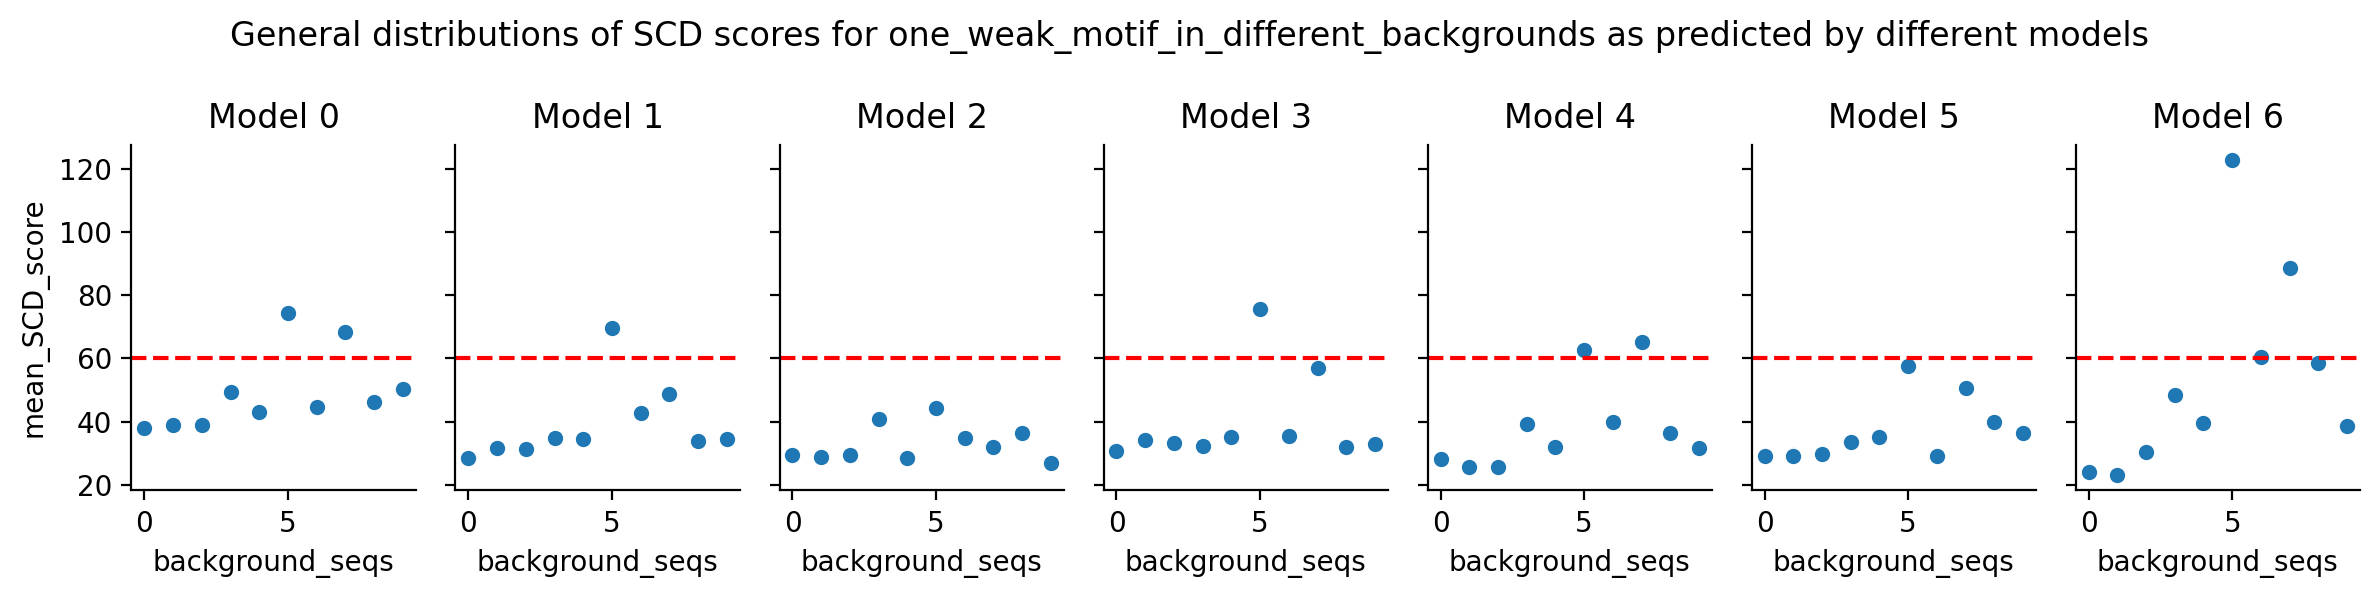

In [5]:
# fig, ax = plt.subplots(figsize=(16, 5),dpi=200)
# dataframe = one_strong_motif_in_different_backgrounds_df
# sns.scatterplot(
#     data=dataframe, y="mean_SCD_score", x='background_seqs',
# )
# sns.despine(top = True, right = True)
# ax.axhline(y=60, color='r', linestyle='--')
# # ax.set_ylim(20,70)
# plt.title(f"General distributions of SCD scores for one_strong_motif_in_different_backgrounds *n={dataframe.shape[0]}*")
# # plt.xticks(rotation=90)
# plt.show()

    
fig, axs = plt.subplots(1, 7, figsize=(12, 3), dpi=200, sharey=True)

for model, ax in zip([0, 1, 2, 3, 4, 5, 6], axs):
    sns.scatterplot(
        data=one_weak_motif_in_different_backgrounds_df,
        x="background_seqs",
        y=f"mean_SCD_score_m{model}",
        ax=ax,
    )
    sns.despine(top=True, right=True, ax=ax)
    ax.axhline(y=60, color="r", linestyle="--")
    ax.set_title(f"Model {model}")
    ax.set_ylabel("mean_SCD_score")
    
plt.suptitle("General distributions of SCD scores for one_weak_motif_in_different_backgrounds as predicted by different models")
plt.tight_layout()
plt.show()

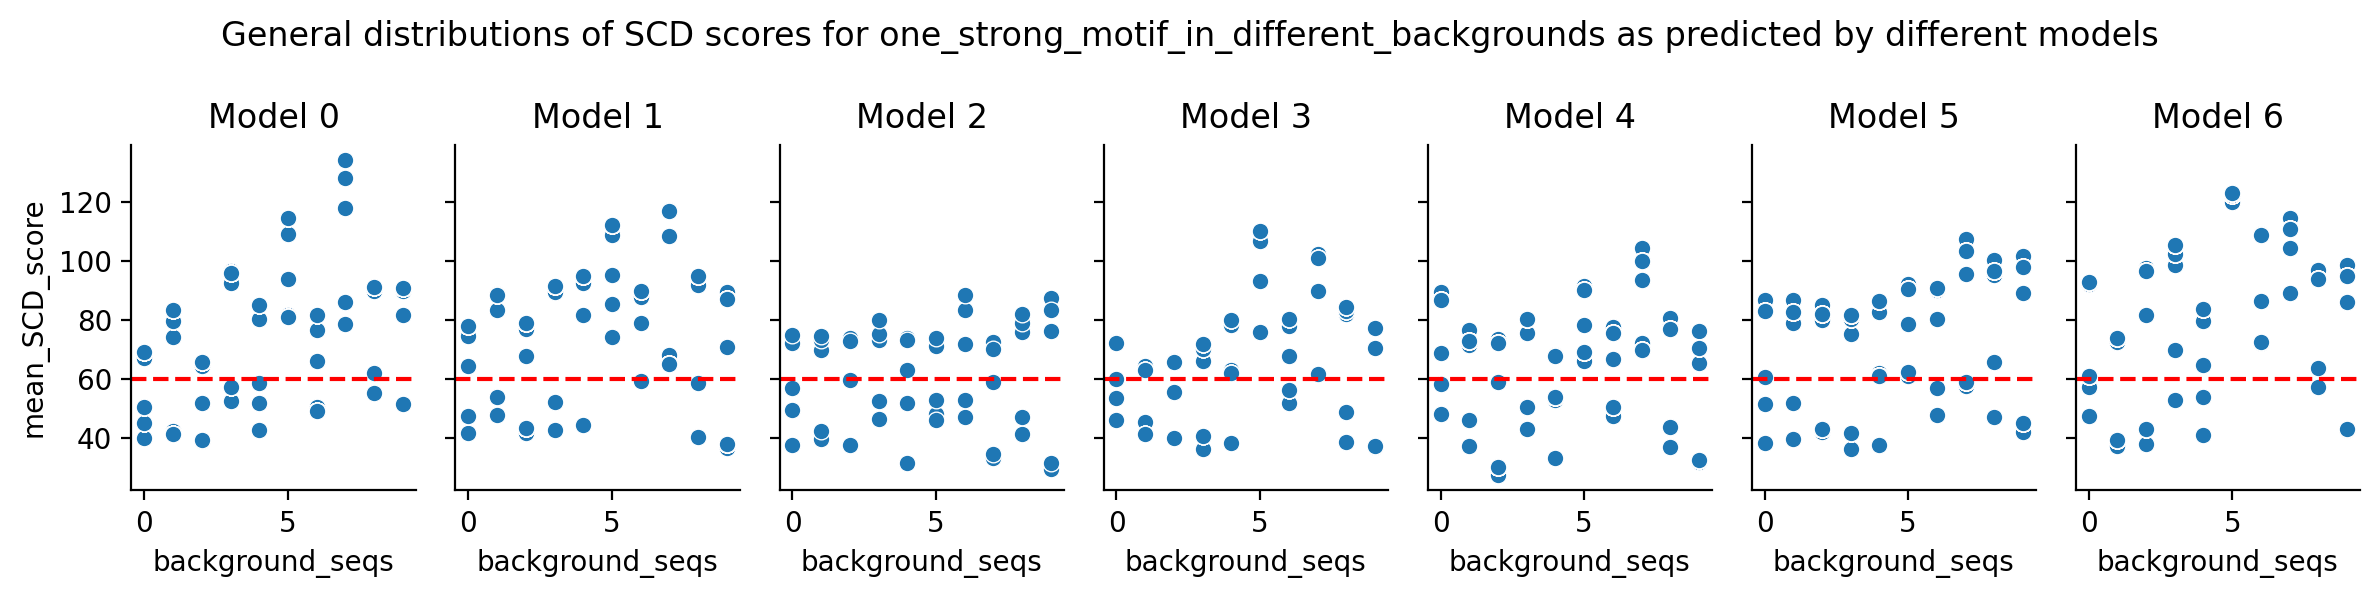

In [6]:
fig, axs = plt.subplots(1, 7, figsize=(12, 3), dpi=200, sharey=True)

for model, ax in zip([0, 1, 2, 3, 4, 5, 6], axs):
    sns.scatterplot(
        data=one_strong_motif_in_different_backgrounds_df,
        x="background_seqs",
        y=f"mean_SCD_score_m{model}",
        ax=ax,
    )
    sns.despine(top=True, right=True, ax=ax)
    ax.axhline(y=60, color="r", linestyle="--")
    ax.set_title(f"Model {model}")
    ax.set_ylabel("mean_SCD_score")
    
plt.suptitle("General distributions of SCD scores for one_strong_motif_in_different_backgrounds as predicted by different models")
plt.tight_layout()
plt.show()